In [1]:
# import the required packages

import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import svm
import xgboost as xgb
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")  #used to ignore all warnings
import matplotlib.pyplot as plt
%matplotlib inline

from math import sqrt

## 1. HR Analytics

### 1.1 Load and Sample the data

In [20]:
hr_data = pd.read_csv('hr_data_new.csv')

In [21]:
hr_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,31,2,2,2,1,35,5.0,3,1,0,50,1
1,1,20,2,1,2,1,33,5.0,6,1,0,51,1
2,1,28,3,1,1,1,50,4.0,17,1,0,47,1
3,5,24,2,1,1,1,30,3.0,7,1,0,84,1
4,4,14,3,1,1,1,34,5.0,7,1,0,78,1


In [22]:
#scale data using minmax
hr_data["region"] = (hr_data["region"] - hr_data["region"].min()) / (hr_data["region"].max()-hr_data["region"].min())
hr_data["education"] = (hr_data["education"] - hr_data["education"].min()) / (hr_data["education"].max()-hr_data["education"].min())
hr_data["gender"] = (hr_data["gender"] - hr_data["gender"].min()) / (hr_data["gender"].max()-hr_data["gender"].min())
hr_data["no_of_trainings"] = (hr_data["no_of_trainings"] - hr_data["no_of_trainings"].min()) / (hr_data["no_of_trainings"].max()-hr_data["no_of_trainings"].min())
hr_data["recruitment_channel"] = (hr_data["recruitment_channel"] - hr_data["recruitment_channel"].min()) / (hr_data["recruitment_channel"].max()-hr_data["recruitment_channel"].min())
hr_data["department"] = (hr_data["department"] - hr_data["department"].min()) / (hr_data["department"].max()-hr_data["department"].min())
hr_data["age"] = (hr_data["age"] - hr_data["age"].min()) / (hr_data["age"].max()-hr_data["age"].min())
hr_data["length_of_service"] = (hr_data["length_of_service"] - hr_data["length_of_service"].min()) / (hr_data["length_of_service"].max()-hr_data["length_of_service"].min())
hr_data["avg_training_score"] = (hr_data["avg_training_score"] - hr_data["avg_training_score"].min()) / (hr_data["avg_training_score"].max()-hr_data["avg_training_score"].min())

In [23]:
# Define Model Inputs (X) and Output (y)
x = hr_data.drop(['is_promoted'], axis =1)
y = hr_data["is_promoted"]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 4)

### 1.2 Build the Model(s)

In [8]:
# Create the logistic regression
lg = LogisticRegression(random_state = 4)
# Fit the model to the training set
lg.fit(x_train,y_train)

LogisticRegression(random_state=4)

In [8]:
#create decision tree
dt = tree.DecisionTreeClassifier(random_state = 4)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=4)

In [9]:
#create ann model
mlp = MLPClassifier(random_state = 4)
# Fit the model to the training set
mlp.fit(x_train,y_train)

MLPClassifier(random_state=4)

In [10]:
#create svc model
svc = svm.SVC(random_state = 4)
svc.fit(x_train,y_train)

SVC(random_state=4)

In [11]:
#create random forest
rf = RandomForestClassifier(random_state = 4) 
rf.fit(x_train,y_train) 

RandomForestClassifier(random_state=4)

In [12]:
#create xgboost classifer
xgb = xgb.XGBClassifier(random_state = 4)
xgb.fit(x_train,y_train)

XGBClassifier(random_state=4)

### 1.3 Evaluate and Improve the Model(s)

In [13]:
#evaluate all models using k folds cross validation because it is more accurate.

lg_results  = cross_validate(lg, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', lg_results['train_score'])
print('test_score: ', lg_results['test_score'])

print('cross val training accuracy is:', sum(lg_results['train_score'])/len(lg_results['train_score']))
print('cross val testing accuracy is:', sum(lg_results['test_score'])/len(lg_results['test_score']))

train_score:  [0.74473    0.7438637  0.74357494 0.74519994 0.75054136]
test_score:  [0.74249423 0.75577367 0.7517321  0.74119006 0.72963605]
cross val training accuracy is: 0.7455819884117195
cross val testing accuracy is: 0.7441652224147892


In [14]:
dt_results  = cross_validate(dt, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', dt_results['train_score'])
print('test_score: ', dt_results['test_score'])

print('cross val training accuracy is:', sum(dt_results['train_score'])/len(dt_results['train_score']))
print('cross val testing accuracy is:', sum(dt_results['test_score'])/len(dt_results['test_score']))

train_score:  [0.99985562 1.         1.         0.99985564 0.99985564]
test_score:  [0.75923788 0.77136259 0.77482679 0.7700751  0.75447718]
cross val training accuracy is: 0.9999133782479145
cross val testing accuracy is: 0.7659959067300137


In [15]:
mlp_results  = cross_validate(mlp, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', mlp_results['train_score'])
print('test_score: ', mlp_results['test_score'])

print('cross val training accuracy is:', sum(mlp_results['train_score'])/len(mlp_results['train_score']))
print('cross val testing accuracy is:', sum(mlp_results['test_score'])/len(mlp_results['test_score']))

train_score:  [0.8208201  0.81648859 0.81706613 0.8195467  0.82445503]
test_score:  [0.80542725 0.8204388  0.8221709  0.80993645 0.78856153]
cross val training accuracy is: 0.8196753103744628
cross val testing accuracy is: 0.8093069859097053


In [16]:
svc_results  = cross_validate(svc, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', svc_results['train_score'])
print('test_score: ', svc_results['test_score'])

print('cross val training accuracy is:', sum(svc_results['train_score'])/len(svc_results['train_score']))
print('cross val testing accuracy is:', sum(svc_results['test_score'])/len(svc_results['test_score']))

train_score:  [0.75931273 0.75656945 0.75628068 0.75516096 0.76295655]
test_score:  [0.74942263 0.76212471 0.75981524 0.76083189 0.74696707]
cross val training accuracy is: 0.7580560751512795
cross val testing accuracy is: 0.7558323093487458


In [17]:
rf_results  = cross_validate(rf, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', rf_results['train_score'])
print('test_score: ', rf_results['test_score'])

print('cross val training accuracy is:', sum(rf_results['train_score'])/len(rf_results['train_score']))
print('cross val testing accuracy is:', sum(rf_results['test_score'])/len(rf_results['test_score']))

train_score:  [0.99985562 1.         1.         0.99985564 0.99985564]
test_score:  [0.80311778 0.81581986 0.80889145 0.80647025 0.77758521]
cross val training accuracy is: 0.9999133782479145
cross val testing accuracy is: 0.8023769117158513


In [18]:
xgb_results  = cross_validate(xgb, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', xgb_results['train_score'])
print('test_score: ', xgb_results['test_score'])

print('cross val training accuracy is:', sum(xgb_results['train_score'])/len(xgb_results['train_score']))
print('cross val testing accuracy is:', sum(xgb_results['test_score'])/len(xgb_results['test_score']))

train_score:  [0.82038695 0.81793243 0.81778805 0.81969106 0.82662047]
test_score:  [0.81177829 0.81293303 0.8204388  0.82149047 0.78625072]
cross val training accuracy is: 0.8204837911771709
cross val testing accuracy is: 0.8105782611073975


### First Model: Random Forest Classifier

In [35]:
#start with random forest classifier.
rf_new = RandomForestClassifier(random_state=4, n_jobs=-1)
param_grid = { 
 "criterion" : ['gini', 'entropy'],
 "max_features": ["auto", 'sqrt', 'log2'],
 "max_depth": [8, 13, 15, 17],   #measures the depth of each tree, higher means more complex.
 "min_samples_leaf" : [3, 5, 7], 
 "min_samples_split" : [2, 4, 6], 
 "n_estimators": [10, 20, 50, 100]}  #number of trees in the model.
rf_gs = GridSearchCV(estimator=rf_new, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
rf_gs = rf_gs.fit(x, y)
print(rf_gs.best_score_)
print(rf_gs.best_params_)

0.8067663700780363
{'criterion': 'entropy', 'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [36]:
rf_final = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100,
                             max_depth=17,
                             min_samples_leaf = 3,
                             min_samples_split = 2,
                             max_features='auto',                             
                             random_state=4,
                             n_jobs=-1)

rf_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', rf_final.score(x_train,y_train))
print('testing acc: ', rf_final.score(x_test,y_test))
results  = cross_validate(rf_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.898019801980198
testing acc:  0.8102386451116244
cross val training accuracy is: 0.8966563144939463
cross val testing accuracy is: 0.8067663700780363


In [40]:
leaf_range = range(3, 25)
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in leaf_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=4, min_samples_leaf = d,
                             min_samples_split = 2,
                             max_features='auto',   
                                    max_depth=17)
    rf_reg.fit(x_train, y_train) 
    train_acc.append((rf_reg.predict(x_train), y_train))
    test_acc.append((rf_reg.predict(x_test), y_test))
    
    results  = cross_validate(rf_reg, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



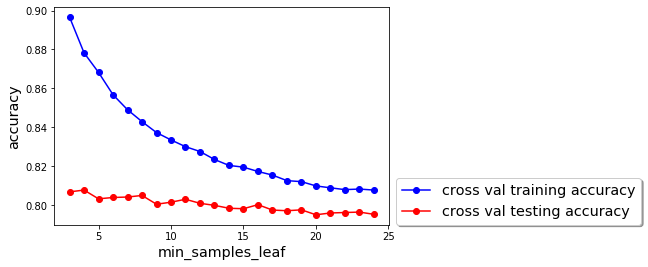

In [41]:
#from this chart, you can see that as the min_samples_leaf value increases, the model actually gets less overfit
#however, as the value increases, the testing accuracy decreases slightly as well.
#after analyzing this chart, i found that 16 is the best value for the model 
#because it is one highest point and the model is not overfitted(not more than 2-3%)
plt.plot(leaf_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(leaf_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('min_samples_leaf', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc=(1.02,0), shadow=True, fontsize='x-large')
plt.show()

In [39]:
#shows that less overfitted after i increased the min_samples_leaf
rf_final = RandomForestClassifier(criterion='entropy', 
                             n_estimators=100,
                             max_depth=17,
                             min_samples_leaf = 16,
                             min_samples_split = 2,
                             max_features='auto',                             
                             random_state=4,
                             n_jobs=-1)

rf_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', rf_final.score(x_train,y_train))
print('testing acc: ', rf_final.score(x_test,y_test))
results  = cross_validate(rf_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.813036303630363
testing acc:  0.8071593533487298
cross val training accuracy is: 0.8172499930278223
cross val testing accuracy is: 0.8001826494984143


In [22]:
split_range = range(2, 25)
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in split_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=4, min_samples_leaf = 10,
                             min_samples_split = d,
                             max_features='auto',   
                                    max_depth=17)
    rf_reg.fit(x_train, y_train) 
    train_acc.append((rf_reg.predict(x_train), y_train))
    test_acc.append((rf_reg.predict(x_test), y_test))
    
    results  = cross_validate(rf_reg, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



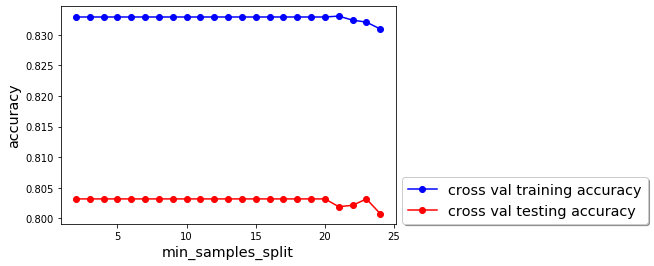

In [23]:
plt.plot(split_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(split_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('min_samples_split', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc=(1.02,0), shadow=True, fontsize='x-large')
plt.show()

In [29]:
estimator_range = range(100,500,100)
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in estimator_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(criterion='entropy', n_estimators=d, random_state=4, min_samples_leaf = 16,
                             min_samples_split = 2,
                             max_features='auto',   
                                    max_depth=17)
    rf_reg.fit(x_train, y_train) 
    train_acc.append((rf_reg.predict(x_train), y_train))
    test_acc.append((rf_reg.predict(x_test), y_test))
    
    results  = cross_validate(rf_reg, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



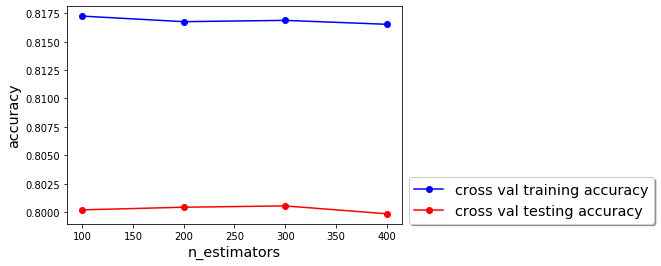

In [30]:
plt.plot(estimator_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(estimator_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('n_estimators', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc=(1.02,0), shadow=True, fontsize='x-large')
plt.show()

In [16]:
rf_final = RandomForestClassifier(criterion='entropy', 
                             n_estimators=300,
                             max_depth=17,
                             min_samples_leaf = 16,
                             min_samples_split = 2,
                             max_features='auto',                             
                             random_state=4,
                             n_jobs=-1)

rf_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', rf_final.score(x_train,y_train))
print('testing acc: ', rf_final.score(x_test,y_test))
results  = cross_validate(rf_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8100660066006601
testing acc:  0.8025404157043879
cross val training accuracy is: 0.8168746043106776
cross val testing accuracy is: 0.8005292699490208


In [22]:
depth_range = range(10,25)
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in depth_range:
    # Create Random Forest Model
    rf_reg = RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=4, min_samples_leaf = 16,
                             min_samples_split = 2,
                             max_features='auto',   
                                    max_depth=d)
    rf_reg.fit(x_train, y_train) 
    train_acc.append((rf_reg.predict(x_train), y_train))
    test_acc.append((rf_reg.predict(x_test), y_test))
    
    results  = cross_validate(rf_reg, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



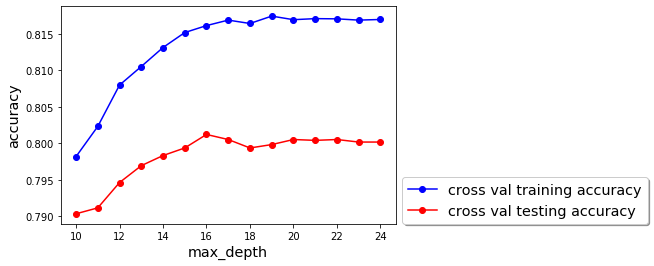

In [23]:
plt.plot(depth_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(depth_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc=(1.02,0), shadow=True, fontsize='x-large')
plt.show()

In [24]:
rf_final = RandomForestClassifier(criterion='entropy', 
                             n_estimators=300,
                             max_depth=16,
                             min_samples_leaf = 16,
                             min_samples_split = 2,
                             max_features='auto',                             
                             random_state=4,
                             n_jobs=-1)

rf_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', rf_final.score(x_train,y_train))
print('testing acc: ', rf_final.score(x_test,y_test))
results  = cross_validate(rf_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8094059405940595
testing acc:  0.8036951501154734
cross val training accuracy is: 0.8161238268763882
cross val testing accuracy is: 0.8012219771774849


### Second Model: XGBoost Classifier

In [36]:
xgb_new = xgb.XGBClassifier(random_state=4, n_jobs=-1)
param_grid = {
    "max_depth": [3, 5, 7], 
    "learning_rate": [0.1, 0.3, 0.5], 
    "gamma": [0, 0.1, 0.3], 
    "min_child_weight ": [0.5, 1, 2], 
    "subsample": [0.6, 0.7, 0.9],
    "colsample_bytree": [0.6, 0.7, 0.9],
}
xgb_gs = GridSearchCV(estimator=xgb_new, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
xgb_gs = xgb_gs.fit(x, y)
print(xgb_gs.best_score_)
print(xgb_gs.best_params_)

0.8206274523930552
{'colsample_bytree': 0.9, 'gamma': 0.3, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight ': 0.5, 'subsample': 0.9}


In [25]:
xgb_final = xgb.XGBClassifier(  
    colsample_bytree= 0.9,
    max_depth = 3,
    gamma = 0.3,
    learning_rate = 0.3,
    min_child_weight = 0.5,
    subsample=0.9,
    random_state=4,
    n_jobs=-1
)

xgb_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', xgb_final.score(x_train,y_train))
print('testing acc: ', xgb_final.score(x_test,y_test))
results  = cross_validate(xgb_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8567656765676568
testing acc:  0.8229407236335643
cross val training accuracy is: 0.8514379006579109
cross val testing accuracy is: 0.8161228541352299


In [16]:
learning_range = [i/10.0 for i in range(0,5)]
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in learning_range:
    # Create Random Forest Model
    xgb_tune = xgb.XGBClassifier(  
    colsample_bytree= 0.9,
    max_depth = 3,
    gamma = 0.3,
    learning_rate = d,
    min_child_weight = 0.5,
    subsample=0.9,
        random_state=4,
    n_jobs=-1)
    
    xgb_tune.fit(x_train, y_train) 
    train_acc.append((xgb_tune.predict(x_train), y_train))
    test_acc.append((xgb_tune.predict(x_test), y_test))
    
    results  = cross_validate(xgb_tune, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



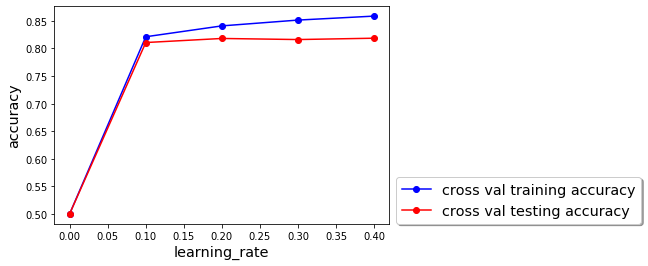

In [17]:
plt.plot(learning_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(learning_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('learning_rate', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc=(1.02,0), shadow=True, fontsize='x-large')
plt.show()

In [40]:
xgb_final = xgb.XGBClassifier(  
    colsample_bytree= 0.9,
    max_depth = 3,
    gamma = 0.3,
    learning_rate = 0.2,
    min_child_weight = 0.5,
    subsample=0.9,
    random_state=4,
    n_jobs=-1
)

xgb_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', xgb_final.score(x_train,y_train))
print('testing acc: ', xgb_final.score(x_test,y_test))
results  = cross_validate(xgb_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8414191419141914
testing acc:  0.8210161662817552
cross val training accuracy is: 0.8408985859339765
cross val testing accuracy is: 0.8180863695977308


In [43]:
weight_range = range(1, 20)
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in weight_range:
    # Create Random Forest Model
    xgb_tune = xgb.XGBClassifier(  
    colsample_bytree= 0.9,
    max_depth = 3,
    gamma = 0.3,
    learning_rate = 0.2,
    min_child_weight = d,
    subsample=0.9,
    random_state=4,
    n_jobs=-1)
    
    xgb_tune.fit(x_train, y_train) 
    train_acc.append((xgb_tune.predict(x_train), y_train))
    test_acc.append((xgb_tune.predict(x_test), y_test))
    
    results  = cross_validate(xgb_tune, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



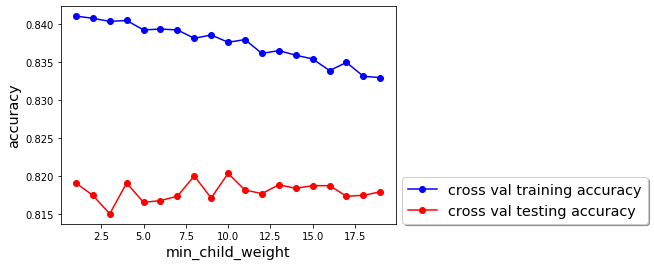

In [44]:
plt.plot(weight_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(weight_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('min_child_weight', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc=(1.02,0), shadow=True, fontsize='x-large')
plt.show()

In [45]:
xgb_final = xgb.XGBClassifier(  
    colsample_bytree= 0.9,
    max_depth = 3,
    gamma = 0.3,
    learning_rate = 0.2,
    min_child_weight = 10,
    subsample=0.9,
    random_state=4,
    n_jobs=-1
)

xgb_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', xgb_final.score(x_train,y_train))
print('testing acc: ', xgb_final.score(x_test,y_test))
results  = cross_validate(xgb_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8374587458745875
testing acc:  0.8210161662817552
cross val training accuracy is: 0.8376355859282654
cross val testing accuracy is: 0.8203966389290255


In [46]:
 depth_range = range(1, 10)
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in depth_range:
    # Create Random Forest Model
    xgb_tune = xgb.XGBClassifier(  
    colsample_bytree= 0.9,
    max_depth = d,
    gamma = 0.3,
    learning_rate = 0.2,
    min_child_weight = 10,
    subsample=0.9,
    random_state=4,
    n_jobs=-1)
    
    xgb_tune.fit(x_train, y_train) 
    train_acc.append((xgb_tune.predict(x_train), y_train))
    test_acc.append((xgb_tune.predict(x_test), y_test))
    
    results  = cross_validate(xgb_tune, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



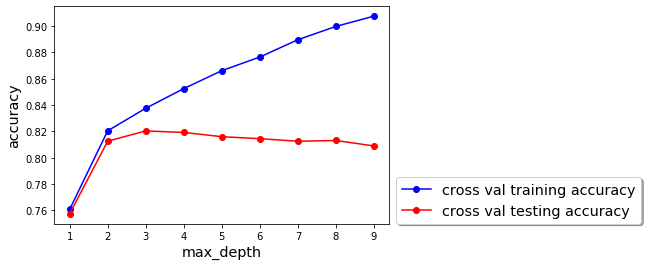

In [47]:
plt.plot(depth_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(depth_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc=(1.02,0), shadow=True, fontsize='x-large')
plt.show()

In [48]:
gamma_range = [i/10.0 for i in range(0,10)]
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in gamma_range:
    # Create Random Forest Model
    xgb_tune = xgb.XGBClassifier(  
    colsample_bytree= 0.9,
    max_depth = 3,
    gamma = d,
    learning_rate = 0.2,
    min_child_weight = 10,
    subsample=0.9,
    random_state=4,
    n_jobs=-1)
    
    xgb_tune.fit(x_train, y_train) 
    train_acc.append((xgb_tune.predict(x_train), y_train))
    test_acc.append((xgb_tune.predict(x_test), y_test))
    
    results  = cross_validate(xgb_tune, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



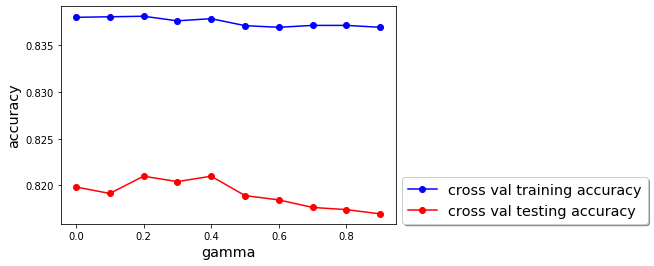

In [49]:
plt.plot(gamma_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(gamma_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('gamma', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc=(1.02,0), shadow=True, fontsize='x-large')
plt.show()

In [50]:
xgb_final = xgb.XGBClassifier(  
    colsample_bytree= 0.9,
    max_depth = 3,
    gamma = 0.4,
    learning_rate = 0.2,
    min_child_weight = 10,
    subsample=0.9,
    random_state=4,
    n_jobs=-1
)

xgb_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', xgb_final.score(x_train,y_train))
print('testing acc: ', xgb_final.score(x_test,y_test))
results  = cross_validate(xgb_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8374587458745875
testing acc:  0.8210161662817552
cross val training accuracy is: 0.8378666036690288
cross val testing accuracy is: 0.8209740728436618


In [8]:
subsample_range = [i/10.0 for i in range(0,11)]
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in subsample_range:
    # Create Random Forest Model
    xgb_tune = xgb.XGBClassifier(  
    colsample_bytree= 0.9,
    max_depth = 3,
    gamma = 0.4,
    learning_rate = 0.2,
    min_child_weight = 10,
    subsample=d,
    random_state=4,
    n_jobs=-1)
    
    xgb_tune.fit(x_train, y_train) 
    train_acc.append((xgb_tune.predict(x_train), y_train))
    test_acc.append((xgb_tune.predict(x_test), y_test))
    
    results  = cross_validate(xgb_tune, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



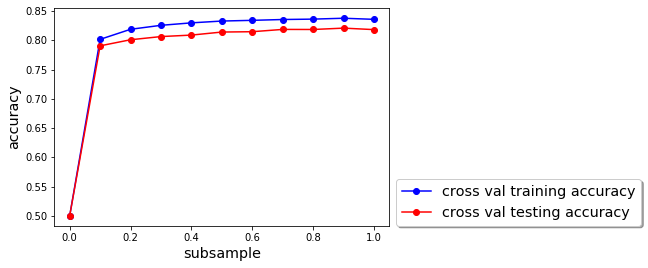

In [9]:
plt.plot(subsample_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(subsample_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('subsample', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc=(1.02,0), shadow=True, fontsize='x-large')
plt.show()

In [10]:
colsample_range = [i/10.0 for i in range(0,11)]
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in colsample_range:
    # Create Random Forest Model
    xgb_tune = xgb.XGBClassifier(  
    colsample_bytree= d,
    max_depth = 3,
    gamma = 0.4,
    learning_rate = 0.2,
    min_child_weight = 10,
    subsample=0.9,
    random_state=4,
    n_jobs=-1)
    
    xgb_tune.fit(x_train, y_train) 
    train_acc.append((xgb_tune.predict(x_train), y_train))
    test_acc.append((xgb_tune.predict(x_test), y_test))
    
    results  = cross_validate(xgb_tune, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



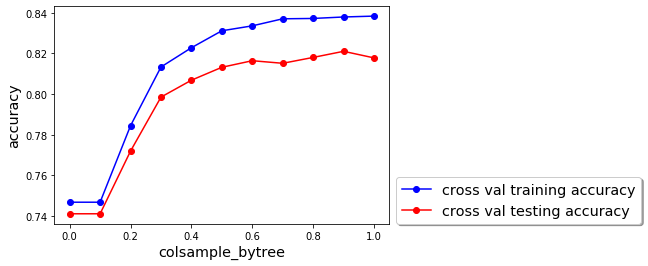

In [11]:
plt.plot(colsample_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(colsample_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('colsample_bytree', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc=(1.02,0), shadow=True, fontsize='x-large')
plt.show()

In [27]:
xgb_final = xgb.XGBClassifier(  
    colsample_bytree= 0.9,
    max_depth = 3,
    gamma = 0.4,
    learning_rate = 0.2,
    min_child_weight = 10,
    subsample=0.9,
    random_state=4,
    n_jobs=-1
)

xgb_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', xgb_final.score(x_train,y_train))
print('testing acc: ', xgb_final.score(x_test,y_test))
results  = cross_validate(xgb_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8374587458745875
testing acc:  0.8210161662817552
cross val training accuracy is: 0.8378666036690288
cross val testing accuracy is: 0.8209740728436618


### Third Model: SVC 

In [9]:
#since there are so many different kernels, and each kernel have different paramters.
#i will be using gridsearch to find the most optimal kernel first 

svc_new = svm.SVC(random_state=4)
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.1, 0.5, 1, 10, 100, 1000]
    
}
svc_gs = GridSearchCV(estimator=svc_new, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
svc_gs = svc_gs.fit(x, y)
print(svc_gs.best_score_)
print(svc_gs.best_params_)

0.8069983175966581
{'C': 1000, 'kernel': 'rbf'}


In [57]:
#shows that best kernel for svc is rbf and that testing accuracy increased
svc_final= svm.SVC(kernel='rbf', C=100)

svc_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', svc_final.score(x_train,y_train))
print('testing acc: ', svc_final.score(x_test,y_test))
results  = cross_validate(svc_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8070957095709571
testing acc:  0.8098537336412626
cross val training accuracy is: 0.8101754149883936
cross val testing accuracy is: 0.8023775788067878


In [58]:
#now that i know rbf is the best kernel for this dataset, i will be using gridsearch again on c and this time
#since it is rbf, i will be gridsearching gamma.
svc_new = svm.SVC(random_state=4)
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10, 100, 1000, 10000],
    'gamma': [0.01, 0.1, 1, 10, 100]
}
svc_gs = GridSearchCV(estimator=svc_new, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
svc_gs = svc_gs.fit(x, y)
print(svc_gs.best_score_)
print(svc_gs.best_params_)

0.8050350689705319
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [59]:
#after i finish running the gridsearh, this was the result
#though the training accuracy increased quite a bit, the testing accuracy was increased as well.
#now that i know which value should i start from, i will now tune each parameter.
svc_final= svm.SVC(C=1000,gamma=0.1,kernel='rbf')

svc_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', svc_final.score(x_train,y_train))
print('testing acc: ', svc_final.score(x_test,y_test))
results  = cross_validate(svc_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8244224422442245
testing acc:  0.815242494226328
cross val training accuracy is: 0.8260278834582051
cross val testing accuracy is: 0.8050350689705319


In [1]:
#firstly, i will be tuning the c value.
C_range = range(200, 1000, 100)
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in C_range:

    svm_tune = svm.SVC(C=d, kernel='rbf', gamma=0.1)
    
    svm_tune.fit(x_train, y_train) 
    train_acc.append((svm_tune.predict(x_train), y_train))
    test_acc.append((svm_tune.predict(x_test), y_test))
    
    results  = cross_validate(svm_tune, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



NameError: name 'svm' is not defined

In [2]:
#firstly, i will be tuning the c value.
C_range = range(100, 1100, 100)
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in C_range:

    svm_tune = svm.SVC(C=d, kernel='rbf', gamma=0.1)
    
    svm_tune.fit(x_train, y_train) 
    train_acc.append((svm_tune.predict(x_train), y_train))
    test_acc.append((svm_tune.predict(x_test), y_test))
    
    results  = cross_validate(svm_tune, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



NameError: name 'svm' is not defined

In [ ]:
#shows that 0.9 has the highest testing accuracy whcih is the original value. thus, no changes will be made
plt.plot(C_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(C_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('C value', fontsize='x-large')
plt.ylabel('accuracy', fontsize='x-large')

plt.legend(loc=(1.02,0), shadow=True, fontsize='x-large')
plt.show()

In [17]:
svc_final= svm.SVC(C=500,gamma=0.1,kernel='rbf')

svc_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', svc_final.score(x_train,y_train))
print('testing acc: ', svc_final.score(x_test,y_test))
results  = cross_validate(svc_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.81996699669967
testing acc:  0.8144726712856043
cross val training accuracy is: 0.8216677607462103
cross val testing accuracy is: 0.8068827107373624


In [27]:
gamma_range = [i/100 for i in range(1,11)]
train_acc = []
test_acc = []
cross_val_train_acc =[]
cross_val_test_acc =[]

for d in gamma_range:
    svm_tune = svm.SVC(C=500, kernel='rbf', gamma=d)
    
    svm_tune.fit(x_train, y_train) 
    train_acc.append((svm_tune.predict(x_train), y_train))
    test_acc.append((svm_tune.predict(x_test), y_test))
    
    results  = cross_validate(svm_tune, x, y, scoring='accuracy', cv=5, return_train_score = True)
    cross_val_train_acc.append(sum(results['train_score'])/len(results['train_score']))
    cross_val_test_acc.append(sum(results['test_score'])/len(results['test_score']))



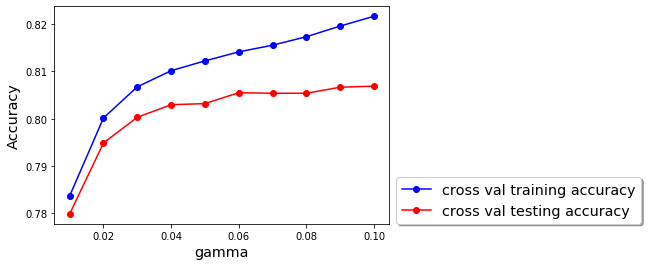

In [28]:
plt.plot(gamma_range, cross_val_train_acc, 'bo-', label ='cross val training accuracy')
plt.plot(gamma_range, cross_val_test_acc, 'ro-', label = 'cross val testing accuracy')

plt.xlabel('gamma', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc=(1.02,0), shadow=True, fontsize='x-large')
plt.show()

In [30]:
svc_final= svm.SVC(C=500,gamma=0.06,kernel='rbf')

svc_final.fit(x_train,y_train)

print('***Final Model***')
print('training acc: ', svc_final.score(x_train,y_train))
print('testing acc: ', svc_final.score(x_test,y_test))
results  = cross_validate(svc_final, x, y, scoring='accuracy', cv=5, return_train_score = True)
print('cross val training accuracy is:', sum(results['train_score'])/len(results['train_score']))
print('cross val testing accuracy is:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8128712871287128
testing acc:  0.8125481139337952
cross val training accuracy is: 0.8141313348174796
cross val testing accuracy is: 0.8054960955167487


## 2. Airbnb Singapore

### 2.1 Load and Sample the data

In [31]:
abnb_data = pd.read_csv('listing_new.csv')

In [32]:
abnb_data.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
0,2,1.33235,103.78521,2,81,90,18,0.28,1,365,2014,12,26
1,1,1.28875,103.80814,2,44,15,18,0.23,32,331,2019,4,21
2,1,1.28837,103.81099,2,40,30,10,0.11,32,276,2018,9,13
3,8,1.31125,103.83816,2,65,2,125,1.35,6,336,2019,8,22
4,1,1.28976,103.80896,2,44,30,13,0.15,32,340,2019,2,2


In [33]:
#scale data using minmax
abnb_data["neighbourhood"] = (abnb_data["neighbourhood"] - abnb_data["neighbourhood"].min()) / (abnb_data["neighbourhood"].max()-abnb_data["neighbourhood"].min())
abnb_data["minimum_nights"] = (abnb_data["minimum_nights"] - abnb_data["minimum_nights"].min()) / (abnb_data["minimum_nights"].max()-abnb_data["minimum_nights"].min())
abnb_data["number_of_reviews"] = (abnb_data["number_of_reviews"] - abnb_data["number_of_reviews"].min()) / (abnb_data["number_of_reviews"].max()-abnb_data["number_of_reviews"].min())
abnb_data["calculated_host_listings_count"] = (abnb_data["calculated_host_listings_count"] - abnb_data["calculated_host_listings_count"].min()) / (abnb_data["calculated_host_listings_count"].max()-abnb_data["calculated_host_listings_count"].min())
abnb_data["availability_365"] = (abnb_data["availability_365"] - abnb_data["availability_365"].min()) / (abnb_data["availability_365"].max()-abnb_data["availability_365"].min())
abnb_data["last_review_year"] = (abnb_data["last_review_year"] - abnb_data["last_review_year"].min()) / (abnb_data["last_review_year"].max()-abnb_data["last_review_year"].min())
abnb_data["last_review_month"] = (abnb_data["last_review_month"] - abnb_data["last_review_month"].min()) / (abnb_data["last_review_month"].max()-abnb_data["last_review_month"].min())
abnb_data["last_review_day"] = (abnb_data["last_review_day"] - abnb_data["last_review_day"].min()) / (abnb_data["last_review_day"].max()-abnb_data["last_review_day"].min())
abnb_data["reviews_per_month"] = (abnb_data["reviews_per_month"] - abnb_data["reviews_per_month"].min()) / (abnb_data["reviews_per_month"].max()-abnb_data["reviews_per_month"].min())
abnb_data["longitude"] = (abnb_data["longitude"] - abnb_data["longitude"].min()) / (abnb_data["longitude"].max()-abnb_data["longitude"].min())
abnb_data["latitude"] = (abnb_data["latitude"] - abnb_data["latitude"].min()) / (abnb_data["latitude"].max()-abnb_data["latitude"].min())
abnb_data["room_type"] = (abnb_data["room_type"] - abnb_data["room_type"].min()) / (abnb_data["room_type"].max()-abnb_data["room_type"].min())


In [34]:
abnb_data

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
0,0.111111,0.730682,0.141594,0.5,81,0.127325,0.055556,0.020031,0.000000,1.000000,0.0,1.000000,0.833333
1,0.055556,0.364880,0.289577,0.5,44,0.020029,0.055556,0.016179,0.113553,0.906849,1.0,0.272727,0.666667
2,0.055556,0.361691,0.307970,0.5,40,0.041488,0.029412,0.006934,0.113553,0.756164,0.8,0.727273,0.400000
3,0.444444,0.553654,0.483317,0.5,65,0.001431,0.405229,0.102465,0.018315,0.920548,1.0,0.636364,0.700000
4,0.055556,0.373353,0.294869,0.5,44,0.041488,0.039216,0.010015,0.113553,0.931507,1.0,0.090909,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,0.277778,0.583019,0.616134,0.0,26,0.000000,0.000000,0.075501,0.025641,0.517808,1.0,0.636364,0.300000
3968,0.333333,0.473614,0.889706,0.5,169,0.001431,0.000000,0.075501,0.000000,1.000000,1.0,0.636364,0.433333
3969,0.277778,0.585536,0.625686,0.0,56,0.000000,0.000000,0.075501,0.025641,0.331507,1.0,0.636364,0.400000
3970,1.000000,0.800151,0.767473,0.5,60,0.000000,0.000000,0.075501,0.000000,0.002740,1.0,0.636364,0.366667


In [35]:
# Define Model Inputs (X) and Output (y)
x = abnb_data.drop(['price'], axis =1)
y = abnb_data["price"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 5)

### 2.2 Build the Model(s)

In [75]:
# train the model using training set
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [76]:
dt = tree.DecisionTreeRegressor(random_state = 5)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=5)

In [77]:
mlp = MLPRegressor(random_state = 5)
mlp.fit(x_train,y_train)

MLPRegressor(random_state=5)

In [78]:
svr = svm.SVR()
svr.fit(x_train,y_train)

SVR()

In [79]:
#create random forest
rf = RandomForestRegressor(random_state = 5) 
rf.fit(x_train,y_train) 

RandomForestRegressor(random_state=5)

In [54]:
xgb = xgb.XGBRegressor(objective = 'reg:squarederror')
xgb.fit(x_train,y_train)

XGBRegressor(objective='reg:squarederror')

### 2.3 Evaluate and Improve the Model(s)

In [ ]:
#evaluate all models using k folds cross validation because it is more accurate.
mlp_results  = cross_validate(mlp, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', mlp_results['train_score'])
print('test_score: ', mlp_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-mlp_results['train_score'])/len(mlp_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-mlp_results['test_score'])/len(mlp_results['test_score']))

In [ ]:
lm_results  = cross_validate(lm, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', lm_results['train_score'])
print('test_score: ', lm_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-lm_results['train_score'])/len(lm_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-lm_results['test_score'])/len(lm_results['test_score']))

In [ ]:
dt_results  = cross_validate(dt, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', dt_results['train_score'])
print('test_score: ', dt_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-dt_results['train_score'])/len(dt_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-dt_results['test_score'])/len(dt_results['test_score']))

In [ ]:
svr_results  = cross_validate(svr, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', svr_results['train_score'])
print('test_score: ', svr_results['test_score'])

print('cross val training mean_squared_error is:', sum(-svr_results['train_score'])/len(svr_results['train_score']))
print('cross val testing mean_squared_error is:', sum(-svr_results['test_score'])/len(svr_results['test_score']))

In [ ]:
rf_results  = cross_validate(rf, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rf_results['train_score'])
print('test_score: ', rf_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-rf_results['train_score'])/len(rf_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-rf_results['test_score'])/len(rf_results['test_score']))

In [ ]:
xgb_results  = cross_validate(xgb, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', xgb_results['train_score'])
print('test_score: ', xgb_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-xgb_results['train_score'])/len(xgb_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-xgb_results['test_score'])/len(xgb_results['test_score']))

### First Model: Random Forest Regressor

In [3]:
rf_new = RandomForestRegressor(random_state=5, n_jobs=-1)
param_grid = {
    "max_depth": [5, 15, 20], 
    "criterion": ['mse'],
    "max_features": ["auto", 'sqrt', 'log2'],
    "min_samples_leaf" : [3, 5, 7, 9],
    "min_samples_split": [3, 5, 7],  
    "n_estimators": [50, 80, 110]} 
    
rf_gs = GridSearchCV(estimator=rf_new, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
rf_gs = rf_gs.fit(x, y)
print(rf_gs.best_score_)
print(rf_gs.best_params_)

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
rf_new = RandomForestRegressor(
    criterion = 'mse',
    max_depth = 15, 
    min_samples_leaf= 3,
    min_samples_split=3, 
    n_estimators= 110,
    n_jobs=-1,
    random_state=5

) 
rf_new.fit(x_train,y_train) 
rf_results  = cross_validate(rf_new, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rf_results['train_score'])
print('test_score: ', rf_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-rf_results['train_score'])/len(rf_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-rf_results['test_score'])/len(rf_results['test_score']))

In [ ]:
leaf_range = range(3,25)

train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in leaf_range:
    # Create Random Forest Model
    rf_reg = RandomForestRegressor(max_depth=15, min_samples_leaf= d, min_samples_split= 3, n_jobs=-1, 
                                   random_state=5, n_estimators=110)
    rf_reg.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(rf_reg.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(rf_reg.predict(x_test), y_test)))
    
    results  = cross_validate(rf_reg, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

In [ ]:
plt.plot(leaf_range, train_rmse, 'bo-', label ='training rmse')
plt.plot(leaf_range, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('min_samples_leaf', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
leaf_range = range(20, 110, 10)

train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in leaf_range:
    # Create Random Forest Model
    rf_reg = RandomForestRegressor(max_depth=15, min_samples_leaf= d, min_samples_split= 3, n_jobs=-1, 
                                   random_state=5, n_estimators=110)
    rf_reg.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(rf_reg.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(rf_reg.predict(x_test), y_test)))
    
    results  = cross_validate(rf_reg, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

In [ ]:
plt.plot(leaf_range, cross_val_train_rmse, 'bo-', label ='training rmse')
plt.plot(leaf_range, cross_val_test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('min_samples_leaf', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
rf_new = RandomForestRegressor(
    criterion = 'mse',
    max_depth = 15, 
    min_samples_leaf= 100,
    min_samples_split= 3, 
    n_estimators= 110,
    n_jobs=-1,
    random_state=5

) 
rf_new.fit(x_train,y_train) 
rf_results  = cross_validate(rf_new, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rf_results['train_score'])
print('test_score: ', rf_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-rf_results['train_score'])/len(rf_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-rf_results['test_score'])/len(rf_results['test_score']))

In [ ]:
split_range = range(3, 25)

train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in split_range:
    # Create Random Forest Model
    rf_reg = RandomForestRegressor(max_depth=15, min_samples_leaf= 100, min_samples_split= d, n_jobs=-1, 
                                   random_state=5, n_estimators=110)
    rf_reg.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(rf_reg.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(rf_reg.predict(x_test), y_test)))
    
    results  = cross_validate(rf_reg, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

In [ ]:
plt.plot(split_range, train_rmse, 'bo-', label ='training rmse')
plt.plot(split_range, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('min_samples_split', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
estimators_range = range(110, 310, 10)

train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in estimators_range:
    # Create Random Forest Model
    rf_reg = RandomForestRegressor(max_depth=15, min_samples_leaf= 100, min_samples_split= 3, n_jobs=-1, 
                                   random_state=5, n_estimators=d)
    rf_reg.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(rf_reg.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(rf_reg.predict(x_test), y_test)))
    
    results  = cross_validate(rf_reg, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

In [ ]:
#this shows that the n_estimators does not really affect the training and testing rmse.
#tus, i will not be making any changes to the existing value
plt.plot(estimators_range, train_rmse, 'bo-', label ='training rmse')
plt.plot(estimators_range, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('n_estimators', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
depth_range = range(1, 20)

train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in depth_range:
    # Create Random Forest Model
    rf_reg = RandomForestRegressor(max_depth=d, min_samples_leaf= 100, min_samples_split= 3, n_jobs=-1, 
                                   random_state=5, n_estimators=110)
    rf_reg.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(rf_reg.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(rf_reg.predict(x_test), y_test)))
    
    results  = cross_validate(rf_reg, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

In [ ]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_rmse, 'bo-', label ='training rmse')
plt.plot(depth_range, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [53]:
rf_new = RandomForestRegressor(
    criterion = 'mse',
    max_depth = 4, 
    min_samples_leaf= 100,
    min_samples_split= 3, 
    n_estimators= 110,
    n_jobs=-1,
    random_state=5

) 
rf_new.fit(x_train,y_train) 
rf_results  = cross_validate(rf_new, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rf_results['train_score'])
print('test_score: ', rf_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-rf_results['train_score'])/len(rf_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-rf_results['test_score'])/len(rf_results['test_score']))

train_score:  [-60.91126457 -60.84943357 -59.27404656 -60.01200197 -57.63562481]
test_score:  [-59.57970533 -57.86250508 -62.77198028 -60.18329827 -72.6698325 ]
cross val training root mean_squared_error is: 59.73647429613517
cross val testing root mean_squared_error is: 62.613464291567865


### Second Model: XGBoost Regressor

In [ ]:
xgb_new = xgb.XGBRegressor(random_state=4, n_jobs=-1, objective = 'reg:squarederror')
param_grid = {
    "max_depth": [4, 6, 12], #default is 6, Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
    "learning_rate": [0.1, 0.2, 0.3, 0.5], #default is 0.3, higher will make it more complex
    "gamma": [0, 0.1, 0.3, 0.5], #default is 0
    "min_child_weight ": [0.1, 0.5, 1], #default is 1, The larger min_child_weight is, the more conservative the algorithm will be.
    "subsample": [0.6, 0.7, 0.9],
    "colsample_bytree": [0.6, 0.7, 0.9],
}
xgb_gs = GridSearchCV(estimator=xgb_new, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
xgb_gs = xgb_gs.fit(x, y)
print(xgb_gs.best_score_)
print(xgb_gs.best_params_)

In [ ]:
xgb_new = xgb.XGBRegressor(
    colsample_bytree=0.9, 
    gamma=0.1,
    learning_rate= 0.1,
    max_depth=6, 
    min_child_weight= 0.1, 
    subsample =  0.9,
    objective = 'reg:squarederror',
    random_state=4, n_jobs=-1)

xgb_new.fit(x_train,y_train) 
xgb_results  = cross_validate(xgb_new, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', xgb_results['train_score'])
print('test_score: ', xgb_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-xgb_results['train_score'])/len(xgb_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-xgb_results['test_score'])/len(xgb_results['test_score']))

In [ ]:
learning_range = [i/100 for i in range(0,5)]
train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in learning_range:
    # Create Random Forest Model
    xgb_tune = xgb.XGBRegressor(  
    colsample_bytree= 0.9,
    max_depth = 6,
    gamma = 0.1,
    learning_rate = d,
    min_child_weight = 0.1,
    subsample=0.9,
    random_state=4,
    objective = 'reg:squarederror',
    n_jobs=-1)
    
    xgb_tune.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(xgb_tune.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(xgb_tune.predict(x_test), y_test)))
    
    results  = cross_validate(xgb_tune, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))


In [ ]:
plt.plot(learning_range, cross_val_train_rmse, 'bo-', label ='training rmse')
plt.plot(learning_range, cross_val_test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('learning rate', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
xgb_new = xgb.XGBRegressor(
    colsample_bytree=0.9, 
    gamma=0.1,
    learning_rate= 0.02,
    max_depth= 6, 
    min_child_weight= 0.1, 
    subsample =  0.9,
    objective = 'reg:squarederror',
    random_state=4, n_jobs=-1)

xgb_new.fit(x_train,y_train) 
xgb_results  = cross_validate(xgb_new, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', xgb_results['train_score'])
print('test_score: ', xgb_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-xgb_results['train_score'])/len(xgb_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-xgb_results['test_score'])/len(xgb_results['test_score']))

In [ ]:
depth_range = range(1, 15)
train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in depth_range:
    # Create Random Forest Model
    xgb_tune = xgb.XGBRegressor(  
    colsample_bytree= 0.9,
    max_depth = d,
    gamma = 0.1,
    learning_rate = 0.02,
    min_child_weight = 0.1,
    subsample=0.9,
        objective = 'reg:squarederror',
    random_state=4,
    n_jobs=-1)
    
    xgb_tune.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(xgb_tune.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(xgb_tune.predict(x_test), y_test)))
    
    results  = cross_validate(xgb_tune, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

In [ ]:
plt.plot(depth_range, cross_val_train_rmse, 'bo-', label ='training rmse')
plt.plot(depth_range, cross_val_test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
xgb_new = xgb.XGBRegressor(
    colsample_bytree=0.9, 
    gamma=0.1,
    learning_rate= 0.03,
    max_depth= 3, 
    min_child_weight= 0.1, 
    subsample =  0.9,
    objective = 'reg:squarederror',
    random_state=4, n_jobs=-1, )

xgb_new.fit(x_train,y_train) 
xgb_results  = cross_validate(xgb_new, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', xgb_results['train_score'])
print('test_score: ', xgb_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-xgb_results['train_score'])/len(xgb_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-xgb_results['test_score'])/len(xgb_results['test_score']))

In [13]:
weight_range = [i/10.0 for i in range(1,11)]
train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in weight_range:
    # Create Random Forest Model
    xgb_tune = xgb.XGBRegressor(  
    colsample_bytree= 0.9,
    max_depth = 3,
    gamma = 0.1,
    learning_rate = 0.03,
    min_child_weight = d,
    subsample=0.9,
    objective = 'reg:squarederror',
    random_state=4,
    n_jobs=-1)
    
    xgb_tune.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(xgb_tune.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(xgb_tune.predict(x_test), y_test)))
    
    results  = cross_validate(xgb_tune, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

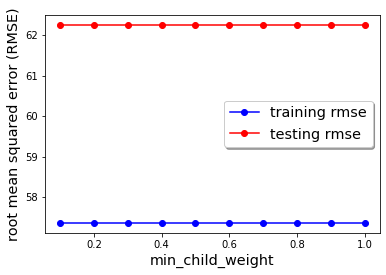

In [14]:
plt.plot(weight_range, train_rmse, 'bo-', label ='training rmse')
plt.plot(weight_range, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('min_child_weight', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [15]:
gamma_range = [i/100 for i in range(1,21)]
train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in gamma_range:
    # Create Random Forest Model
    xgb_tune = xgb.XGBRegressor(  
    colsample_bytree= 0.9,
    max_depth =3,
    gamma = d,
    learning_rate = 0.03,
    min_child_weight = 0.1,
    subsample=0.9,
    objective = 'reg:squarederror',
    random_state=4,
    n_jobs=-1)
    
    xgb_tune.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(xgb_tune.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(xgb_tune.predict(x_test), y_test)))
    
    results  = cross_validate(xgb_tune, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

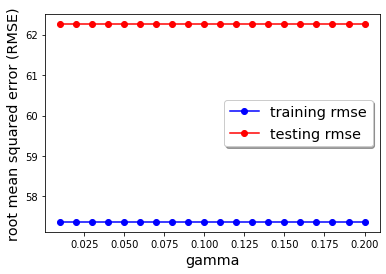

In [16]:
plt.plot(gamma_range, train_rmse, 'bo-', label ='training rmse')
plt.plot(gamma_range, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('gamma', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [17]:
subsample_range = [i/10 for i in range(1,11)]
train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in subsample_range:
    # Create Random Forest Model
    xgb_tune = xgb.XGBRegressor(  
    colsample_bytree= 0.9,
    max_depth = 3,
    gamma = 0.1,
    learning_rate = 0.03,
    min_child_weight = 0.1,
    subsample=d,
    objective = 'reg:squarederror',
    random_state=4,
    n_jobs=-1)
    
    xgb_tune.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(xgb_tune.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(xgb_tune.predict(x_test), y_test)))
    
    results  = cross_validate(xgb_tune, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

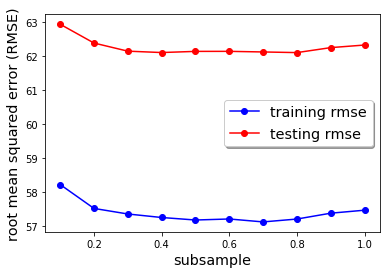

In [18]:
plt.plot(subsample_range, train_rmse, 'bo-', label ='training rmse')
plt.plot(subsample_range, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('subsample', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
xgb_new = xgb.XGBRegressor(
    colsample_bytree=0.9, 
    gamma=0.1,
    learning_rate= 0.03,
    max_depth= 3, 
    min_child_weight= 0.1, 
    subsample =  0.8,
    objective = 'reg:squarederror',
    random_state=4, n_jobs=-1, )

xgb_new.fit(x_train,y_train) 
rf_results  = cross_validate(xgb_new, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rf_results['train_score'])
print('test_score: ', rf_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-rf_results['train_score'])/len(rf_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-rf_results['test_score'])/len(rf_results['test_score']))

In [ ]:
colsample_range = [i/10 for i in range(1,11)]
train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in colsample_range:
    # Create Random Forest Model
    xgb_tune = xgb.XGBRegressor(  
    colsample_bytree= d,
    max_depth = 3,
    gamma = 0.1,
    learning_rate = 0.03,
    min_child_weight = 0.1,
    subsample=0.8,
    objective = 'reg:squarederror',
    random_state=4,
    n_jobs=-1)
    
    xgb_tune.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(xgb_tune.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(xgb_tune.predict(x_test), y_test)))
    
    results  = cross_validate(xgb_tune, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

In [ ]:
plt.plot(colsample_range, train_rmse, 'bo-', label ='training rmse')
plt.plot(colsample_range, test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('colsample_bytree', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [ ]:
xgb_new = xgb.XGBRegressor(
    colsample_bytree=1, 
    gamma=0.1,
    learning_rate= 0.03,
    max_depth= 3, 
    min_child_weight= 0.1, 
    subsample =  0.9,
    objective = 'reg:squarederror',
    random_state=4, n_jobs=-1, )

xgb_new.fit(x_train,y_train) 
xgb_results  = cross_validate(xgb_new, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', xgb_results['train_score'])
print('test_score: ', xgb_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-xgb_results['train_score'])/len(xgb_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-xgb_results['test_score'])/len(xgb_results['test_score']))

### Third Model: SVR

In [ ]:
svr_new = svm.SVR()
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100, 1000]
}
svr_gs = GridSearchCV(estimator=svr_new, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
svr_gs = svr_gs.fit(x, y)
print(svr_gs.best_score_)
print(svr_gs.best_params_)

In [ ]:
svr_new = svm.SVR()
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10, 100, 1000, 10000],
    'gamma': [0.01, 0.1, 1, 10, 100]
}
svr_gs = GridSearchCV(estimator=svr_new, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
svr_gs = svr_gs.fit(x, y)
print(svr_gs.best_score_)
print(svr_gs.best_params_)

In [ ]:
svr_new = svm.SVR(C=1000, gamma=1, kernel='rbf')
svr_new.fit(x_train,y_train)

svr_results  = cross_validate(svr_new, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', svr_results['train_score'])
print('test_score: ', svr_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-svr_results['train_score'])/len(svr_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-svr_results['test_score'])/len(svr_results['test_score']))

In [49]:
C_range = range(100, 1000, 100)
train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in C_range:
    svr_tune = svm.SVR(C=d, kernel='rbf', gamma=1)

    svr_tune.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(svr_tune.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(svr_tune.predict(x_test), y_test)))
    
    results  = cross_validate(svr_tune, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

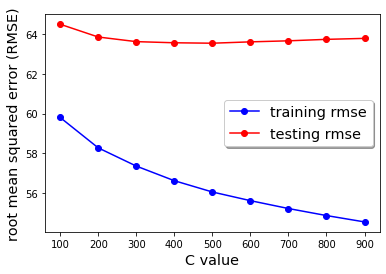

In [50]:
plt.plot(C_range, cross_val_train_rmse, 'bo-', label ='training rmse')
plt.plot(C_range, cross_val_test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('C value', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [47]:
svr_new = svm.SVR(C=300, gamma=1, kernel='rbf')
svr_new.fit(x_train,y_train)

svr_results  = cross_validate(svr_new, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', svr_results['train_score'])
print('test_score: ', svr_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-svr_results['train_score'])/len(svr_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-svr_results['test_score'])/len(svr_results['test_score']))

train_score:  [-59.14592683 -58.43320362 -56.75753067 -57.28661829 -55.19236801]
test_score:  [-59.87210507 -57.8896563  -65.66682178 -60.69313005 -73.93124557]
cross val training root mean_squared_error is: 57.363129483202535
cross val testing root mean_squared_error is: 63.61059175449742


In [41]:
gamma_range = [i/10.0 for i in range(1,11)]
train_rmse = []
test_rmse = []
cross_val_train_rmse =[]
cross_val_test_rmse =[]

for d in gamma_range:
    svr_tune = svm.SVR(C=300, kernel='rbf', gamma=d)

    svr_tune.fit(x_train, y_train) 
    train_rmse.append(sqrt(mean_squared_error(svr_tune.predict(x_train), y_train)))
    test_rmse.append(sqrt(mean_squared_error(svr_tune.predict(x_test), y_test)))
    
    results  = cross_validate(svr_tune, x, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_rmse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_rmse.append(sum(-results['test_score'])/len(results['test_score']))

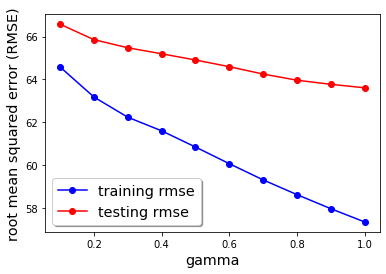

In [42]:
plt.plot(gamma_range, cross_val_train_rmse, 'bo-', label ='training rmse')
plt.plot(gamma_range, cross_val_test_rmse, 'ro-', label = 'testing rmse')

plt.xlabel('gamma', fontsize='x-large')
plt.ylabel('root mean squared error (RMSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [48]:
svr_new = svm.SVR(C=300, gamma=0.1, kernel='rbf')
svr_new.fit(x_train,y_train)

svr_results  = cross_validate(svr_new, x, y.ravel(), scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', svr_results['train_score'])
print('test_score: ', svr_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-svr_results['train_score'])/len(svr_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-svr_results['test_score'])/len(svr_results['test_score']))

train_score:  [-66.00678521 -65.40149742 -64.26473078 -64.90569518 -62.30400852]
test_score:  [-61.52906742 -60.22301786 -66.61081161 -67.16699561 -77.32505389]
cross val training root mean_squared_error is: 64.57654342134336
cross val testing root mean_squared_error is: 66.57098927885865


### Dropping Irrelevant Columns

In [37]:
#drop if p value>0.05
lm2 = sm.OLS(y_train, x_train).fit()
# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              1273.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):                        0.00
Time:                        13:33:47   Log-Likelihood:                         -15496.
No. Observations:                2780   AIC:                                  3.102e+04
Df Residuals:                    2768   BIC:                                  3.109e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood                     14.4266      4.666      3.092      0.002       5.277      23.576
latitude                         -34.2636      9.084     -3.772      0.000     -52.077     -16.451
longitude                         -8.3370      7.755     -1.075      0.282     -23.542       6.868
room_type                        186.2552      4.140     44.989      0.000     178.137     194.373
minimum_nights                  -194.9859     31.915     -6.110      0.000    -257.565    -132.407
number_of_reviews                -63.0234     14.442     -4.364      0.000     -91.342     -34.705
reviews_per_month                 56.6598     18.223      3.109      0.002      20.928      92.392
calculated_host_listings_count   -19.7606      5.765     -3.428      0.001     -31.064      -8.457
availability_365                  34.4033      3.414     10.077      0.000      27.709      41.098
last_review_year                  -2.3363      6.176     -0.378      0.705     -14.446       9.773
last_review_month                 -0.0752      5.228     -0.014      0.989     -10.326      10.176
last_review_day                    4.4761      4.020      1.113      0.266      -3.407      12.359
==============================================================================
Omnibus:                      402.799   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              626.754
Skew:                           1.007   Prob(JB):                    7.98e-137
Kurtosis:                       4.163   Cond. No.                         46.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
duplicate_abnb = abnb_data.copy()
# Define Model Inputs (X) and Output (y)
new_x = duplicate_abnb.drop(['last_review_day', 'last_review_month','last_review_year','longitude', 'price'], axis =1)
new_y = duplicate_abnb["price"]

nx_train, nx_test, ny_train, ny_test = train_test_split(new_x, new_y, test_size=0.3, random_state = 4)

In [52]:
rf_new = RandomForestRegressor(
    criterion = 'mse',
    max_depth = 4, 
    min_samples_leaf= 100,
    min_samples_split= 3, 
    n_estimators= 110,
    n_jobs=-1,
    random_state=5

) 
rf_new.fit(nx_train,ny_train) 
rf_results  = cross_validate(rf_new, new_x, new_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', rf_results['train_score'])
print('test_score: ', rf_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-rf_results['train_score'])/len(rf_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-rf_results['test_score'])/len(rf_results['test_score']))

train_score:  [-61.11211288 -60.63057879 -58.7493925  -60.22881463 -57.37306083]
test_score:  [-59.5276001  -57.15080567 -62.95383538 -60.56019601 -71.84173867]
cross val training root mean_squared_error is: 59.618791925565304
cross val testing root mean_squared_error is: 62.40683516808865


In [51]:
xgb_new = xgb.XGBRegressor(
    colsample_bytree=1, 
    gamma=0.1,
    learning_rate= 0.03,
    max_depth= 3, 
    min_child_weight= 0.1, 
    subsample =  0.9,
    objective = 'reg:squarederror',
    random_state=4, n_jobs=-1, )

xgb_new.fit(nx_train,ny_train)  
xgb_results  = cross_validate(xgb_new, new_x, new_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', xgb_results['train_score'])
print('test_score: ', xgb_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-xgb_results['train_score'])/len(xgb_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-xgb_results['test_score'])/len(xgb_results['test_score']))

train_score:  [-59.91526047 -59.7529982  -57.69066122 -58.63845628 -55.79392763]
test_score:  [-55.1937595  -56.36261113 -62.67153286 -59.54992537 -72.43538073]
cross val training root mean_squared_error is: 58.358260759225104
cross val testing root mean_squared_error is: 61.24264191632793


In [46]:
svr_new = svm.SVR(C=300, gamma=0.1, kernel='rbf')
svr_new.fit(nx_train,ny_train)

svr_results  = cross_validate(svr_new, new_x, new_y, scoring='neg_root_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', svr_results['train_score'])
print('test_score: ', svr_results['test_score'])

print('cross val training root mean_squared_error is:', sum(-svr_results['train_score'])/len(svr_results['train_score']))
print('cross val testing root mean_squared_error is:', sum(-svr_results['test_score'])/len(svr_results['test_score']))

train_score:  [-66.39886971 -66.16706433 -64.95473174 -65.34504562 -62.79738629]
test_score:  [-61.32030646 -59.93994438 -66.73875144 -66.39278823 -76.81404753]
cross val training root mean_squared_error is: 65.13261953752516
cross val testing root mean_squared_error is: 66.24116760833698
